# RL_ddpm

## Model introduction

In this project, we introduce a brain functional connectivity matrix that is fine-tuned by reinforcement learning and reconstructed from fMRI data, and used to generate a picture of the brain functional connectivity matrix over time


We first used a U_Ne to extract a conditional vector from the patient's information (their own brain function connectivity matrix, their own age, target age) to control the denoising process of DDPM

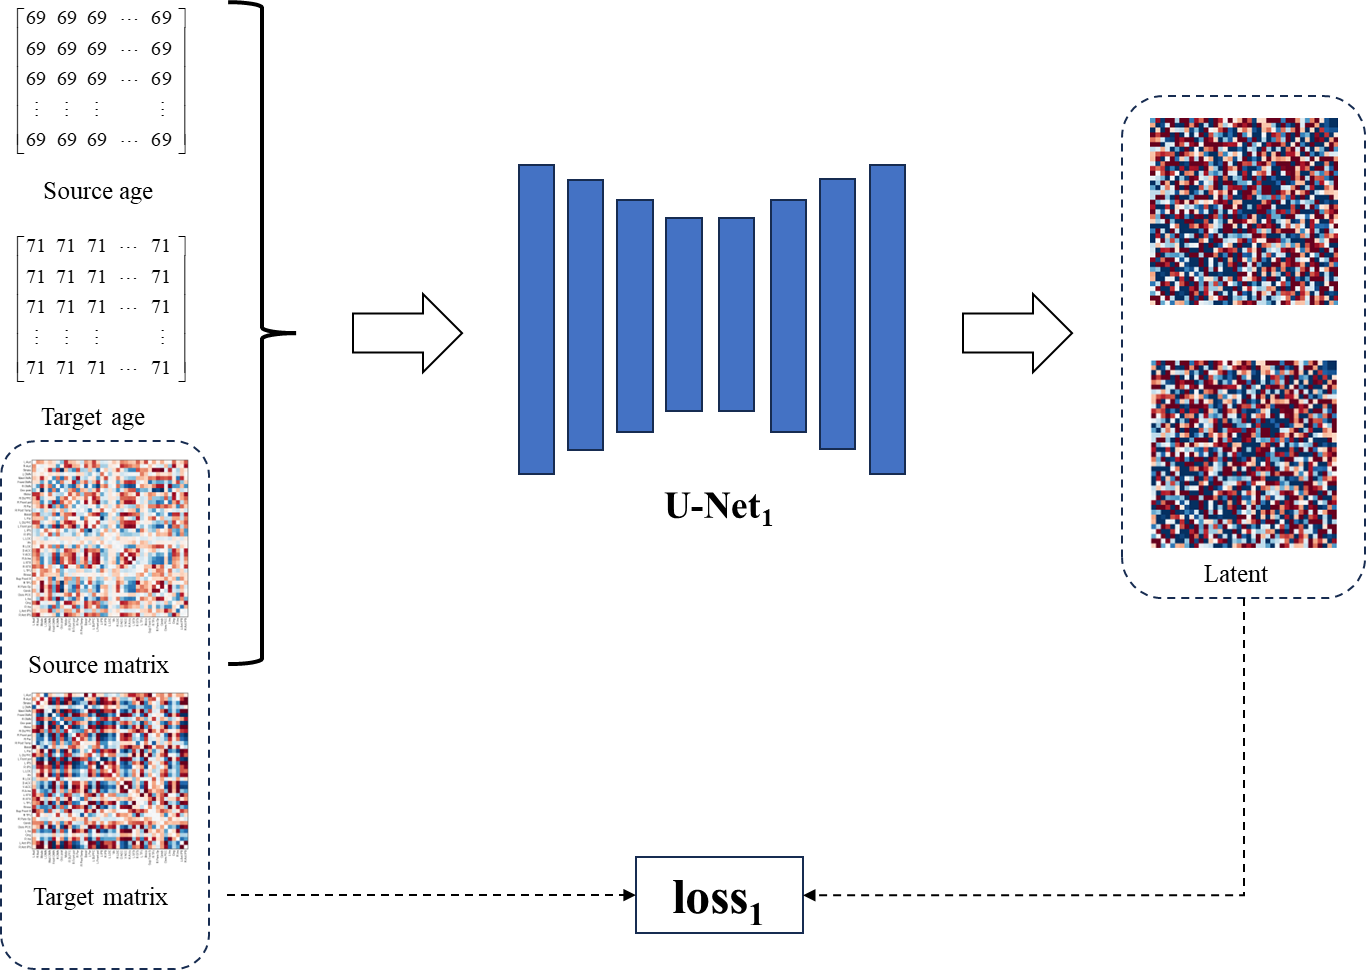

After we extract the conditional vector, we can use it to control the generation of DDPM, and when DDPM is generated, we will randomly select an image as the image at its target age, and the extraction process is as follows:

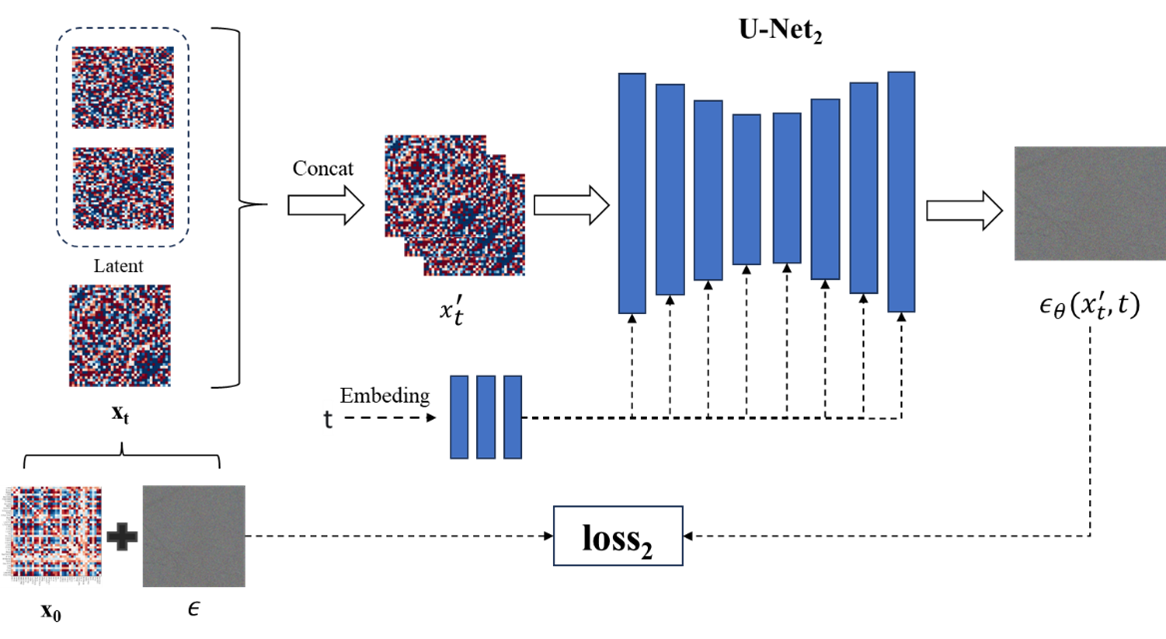

Finally, we use reinforcement learning to tune the model

We model the denoising process as an MDP process as follows: First, we define the state of each step as a tuple, which mainly includes the condition variable c,go to time step t and the denoising result for the current time step$\mathrm{x}_t$, It is important to note here that in MDP $\mathbf{x}_t$ correspond $d d p m$ model denoising process $\operatorname{ddpm}_{T-t}$ 。
$$
s_t \triangleq\left(\mathbf{c}, t, \mathbf{x}_t\right)
$$
For the policy, we define it as a conditional distribution based on the results of the next step of denoising in the current state.
$$
\pi\left(a_t \mid s_t\right) \triangleq p_\theta^{d d p m}\left(\mathbf{x}_{t-1} \mid \mathbf{x}_t, \mathbf{c}, \mathbf{t}\right)
$$

For the action is the result of the next step of denoising.
$$
a_t \triangleq \mathbf{x}_{t-1}
$$

After the next step of denoising is obtained, our state transition is a certainty. So we use
The Dirac Delta distribution represents the state transition probability.
$$
P\left(s_{t+1} \mid s_t, a_t\right) \triangleq\left(\delta_{\mathrm{c}}, \delta_{t-1}, \delta_{\mathbf{x}_{t-1}}\right)
$$

For the state of the initial distribution, where $\mathrm{c}$ is a known prior distribution, the time steps $\mathrm{T}$ is a definite value, and for the denoising result for the last step, We know from the $\mathrm{ddpm}$ principle that it satisfies the standard Gaussian distribution.
$$
\rho_0\left(s_0\right) \triangleq\left(p(\mathbf{c}), \delta_T, \mathcal{N}(\mathbf{0}, \mathbf{I})\right)
$$

For the reward of the model, we can only get the reward for the final denoising result, and we set it to 0 for the reward in the denoising process.
$$
R\left(s_t, a_t\right) \triangleq \begin{cases}r\left(\mathbf{x}_0, \mathbf{c}\right) & \text { if } t=0 \\ 0 & \text { otherwise }\end{cases}
$$
Finally, we introduce a hetero-strategy gradient and a PPO-clip algorithm to get the gradient we need to estimate:
$$
\nabla_\theta \mathcal{J}_{D D R L}=\mathrm{E}\left[\sum_{t=0}^T \min \left(\frac{p_\theta^{d d p m}\left(\boldsymbol{x}_{t-1} \mid, \boldsymbol{x}_t, \boldsymbol{c}, t\right)}{p_{\theta_{\text {old }}}^{d d p m}\left(\boldsymbol{x}_{t-1} \mid, \boldsymbol{x}_t, \boldsymbol{c}, t\right)} A\left(\boldsymbol{x}_0, \boldsymbol{c}\right), \operatorname{clip}\left(\frac{p_\theta^{d d p m}\left(\boldsymbol{x}_{t-1} \mid \boldsymbol{x}_t, \boldsymbol{c}, t\right)}{p_{\theta_{\text {old }}}^{d d p m}\left(\boldsymbol{x}_{t-1} \mid \boldsymbol{x}_t, \boldsymbol{c}, t\right)}, 1-\epsilon, 1+\epsilon\right) A\left(\boldsymbol{x}_0, \boldsymbol{c}\right)\right)\right]
$$

The specific flow chart is as follows

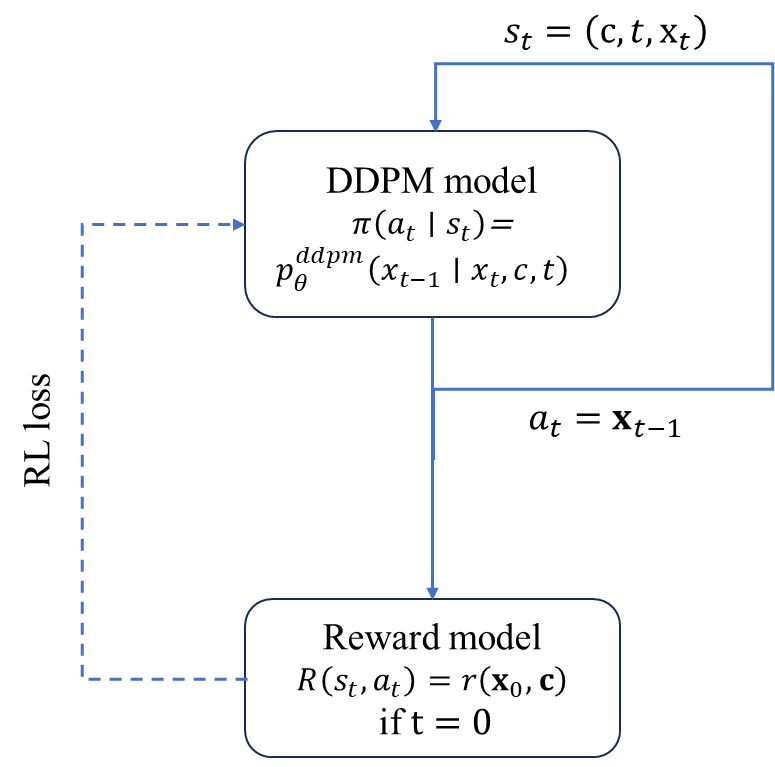

For the reward function, we have designed two reward functions here The first reward function is a function that mixes SSIM and PSNR, as shown in the following formula
$$
R_1\left(\mathrm{x}_0, \mathrm{c}\right)=\alpha * \operatorname{SSIM}\left(\mathrm{x}_0, \mathrm{c}\right)+\beta * \operatorname{PSNR}\left(\mathrm{x}_0, \mathrm{c}\right)
$$

where $\alpha$, $\beta$ are hyperparameters.
We also have a way to design a reward function, we use the model we pre-trained above to generate conditional vectors, we take all the layers that are downsampled in U-Net ${ }_1$, and unfold them into a fully connected layer to predict the age of the patient, but at this point, we change the value of the input age channel and the output age channel to 0. The specific structure is shown in the figure below

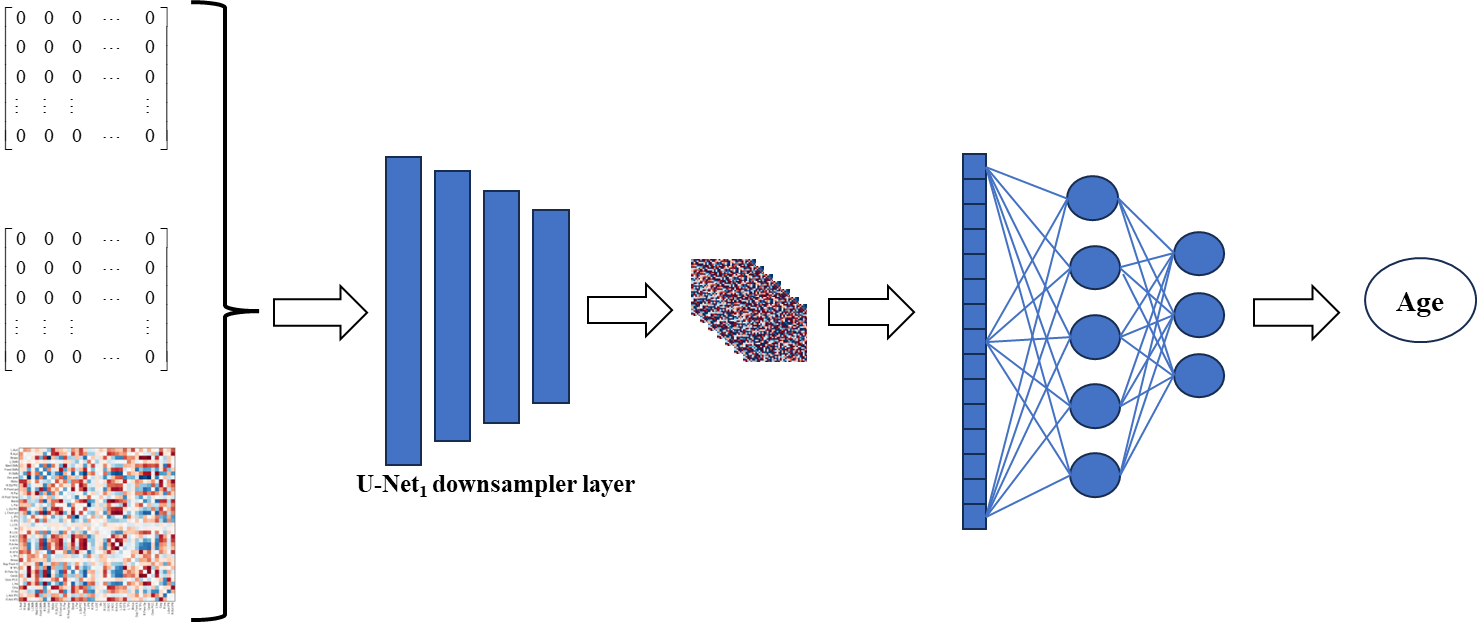

## Installation requirements

torch  
tqdm  
typing  
numpy  
matplotlib  
nilearn